### include libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import math

from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import matplotlib as mpl

### calculate DCR probability, assuming Poisson distribution:

In [2]:
def dcr_probability(dcr_hz, window_s):
    return 1 - math.exp(- (dcr_hz*window_s))

### Set important constants, like:
 1. threshold in p.e. (**threshold_pe**); 
 2. optical-crosstalk (**p_xt**);
 3. dark count rate per mm (**dcr_hz_mm**);
 4. night sky background (**nsb_hz**); 
 5. read-out window at s (**window_s**);
 6. sensor area in mm (**area_mm**)

**These are bold words, not a bullet list**

In [3]:
threshold_pe = 4

p_xt = 0.1
dcr_hz_mm = 140.e3
nsb_hz = 17.e6
window_s = 100.e-9
area_mm = 9.

### Calculate rate for a given threshold in p.e.

In [4]:
probability = 0.0


for i_pe in range(threshold_pe):
    
    uncorelated_hz = nsb_hz + dcr_hz_mm*area_mm
    probability = probability + (pow(dcr_probability(uncorelated_hz, window_s), i_pe+1))*(pow(p_xt, threshold_pe - i_pe - 1))
    
print("Probability is: {:e} to be triggered by noise event within {} ns window".format(probability, window_s*1.e9))
print("trigger rate, for continiust read-out: {:f} KHz ".format((probability/window_s)/1.e3))

Probability is: 5.622955e-01 to be triggered by noise event within 100.0 ns window
trigger rate, for continiust read-out: 5622.955428 KHz 


In [20]:
 data = np.fromfile('/home/andrii/work/terzina/dose_al_center_sphere.txt', dtype=float, sep=[','])

TypeError: fromfile() argument 4 must be str, not list

In [19]:
data

array([0.05])

In [102]:
data_test = np.loadtxt('/home/andrii/work/terzina/dose_al_center_sphere.txt', dtype=float, comments='#', delimiter = ', ')


In [89]:
data_test_sphere = np.loadtxt('/home/andrii/work/terzina/dose_al_center_sphere.txt', dtype=float, comments='#', delimiter = ', ')

In [90]:
data_test_slab = np.loadtxt('/home/andrii/work/terzina/dose_al_slab_shield.txt', dtype=float, comments='#', delimiter = ', ')

In [91]:
data_test_semi_inf = np.loadtxt('/home/andrii/work/terzina/dose_al_semi_infinit.txt', dtype=float, comments='#', delimiter = ', ')

In [92]:
thickness_sphere = data_test_sphere[:, 0]
dose_total_sphere = data_test_sphere[:, 1]

thickness_slab = data_test_slab[:, 0]
dose_total_slab = data_test_slab[:, 1]

thickness_semi_inf = data_test_semi_inf[:, 0]
dose_total_semi_inf = data_test_semi_inf[:, 1]

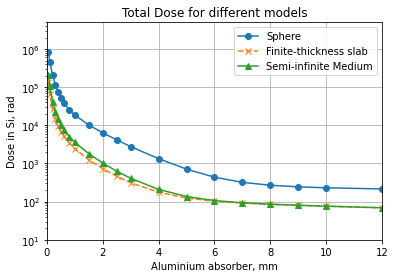

In [101]:
plt.plot(thickness_sphere, dose_total_sphere, 'o-', label='Sphere')
plt.plot(thickness_slab, dose_total_slab, 'x--', label='Finite-thickness slab')
plt.plot(thickness_semi_inf, dose_total_semi_inf, '^-', label='Semi-infinite Medium')
#plt.plot(thickness, dose_Trapped_Protons, '^-', label='Trapped Protons')
plt.yscale('log')
plt.legend()
plt.ylabel('Dose in Si, rad')
plt.title('Total Dose for different models')
plt.xlabel('Aluminium absorber, mm')
plt.xlim(0.0, 12)
plt.ylim(10.0, 5.e6)
plt.grid()
plt.savefig('Dose_Si_Al_models.png', dpi = 800)


In [103]:
thickness = data_test[:, 0]
dose_total = data_test[:, 1]
dose_Electrons = data_test[:, 2]
dose_Bremsstrahlung = data_test[:, 3]
dose_Trapped_Protons = data_test[:, 4]

In [107]:
al_denity = 2.7
fused_silica_density = 2.17

In [108]:
thickness_silica = thickness*al_denity/fused_silica_density

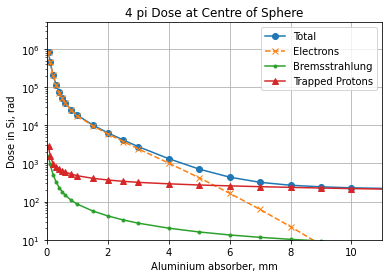

In [112]:
plt.plot(thickness, dose_total, 'o-', label='Total')
plt.plot(thickness, dose_Electrons, 'x--', label='Electrons')
plt.plot(thickness, dose_Bremsstrahlung, '.-', label='Bremsstrahlung')
plt.plot(thickness, dose_Trapped_Protons, '^-', label='Trapped Protons')
plt.yscale('log')
plt.legend()
plt.ylabel('Dose in Si, rad')
plt.title('4 pi Dose at Centre of Sphere')
plt.xlabel('Aluminium absorber, mm')
plt.xlim(0.0, 11)
plt.ylim(10.0, 5.e6)
plt.grid()
plt.savefig('Dose_Si_Al_sphere.png', dpi = 800)


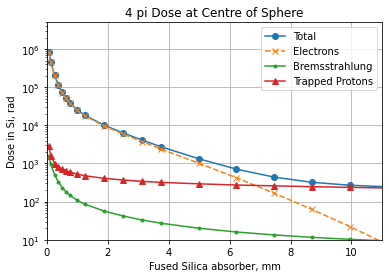

In [113]:
plt.plot(thickness_silica, dose_total, 'o-', label='Total')
plt.plot(thickness_silica, dose_Electrons, 'x--', label='Electrons')
plt.plot(thickness_silica, dose_Bremsstrahlung, '.-', label='Bremsstrahlung')
plt.plot(thickness_silica, dose_Trapped_Protons, '^-', label='Trapped Protons')
plt.yscale('log')
plt.legend()
plt.ylabel('Dose in Si, rad')
plt.title('4 pi Dose at Centre of Sphere')
plt.xlabel('Fused Silica absorber, mm')
plt.xlim(0.0, 11)
plt.ylim(10.0, 5.e6)
plt.grid()
plt.savefig('Dose_Si_Silica_sphere.png', dpi = 800)

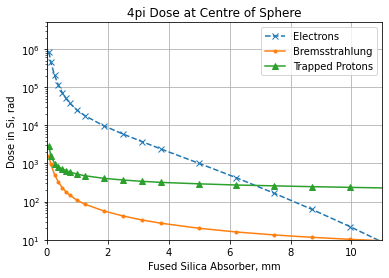

In [109]:
plt.plot(thickness_silica, dose_Electrons, 'x--', label='Electrons')
plt.plot(thickness_silica, dose_Bremsstrahlung, '.-', label='Bremsstrahlung')
plt.plot(thickness_silica, dose_Trapped_Protons, '^-', label='Trapped Protons')
plt.yscale('log')
plt.legend()
plt.ylabel('Dose in Si, rad')
plt.title('4pi Dose at Centre of Sphere')
plt.xlabel('Fused Silica Absorber, mm')
plt.xlim(0.0, 11)
plt.ylim(10.0, 5.e6)
plt.grid()
plt.savefig('Dose_Si_Fused_Silica.png', dpi = 800)

In [40]:
thickness

array([ 0.05,  0.1 ,  0.2 ,  0.3 ,  0.4 ,  0.5 ,  0.6 ,  0.8 ,  1.  ,
        1.5 ,  2.  ,  2.5 ,  3.  ,  4.  ,  5.  ,  6.  ,  7.  ,  8.  ,
        9.  , 10.  , 12.  , 14.  , 16.  , 18.  , 20.  ])